<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [10]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.0 Variable Identification

In [11]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [12]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [13]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
diamonds.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


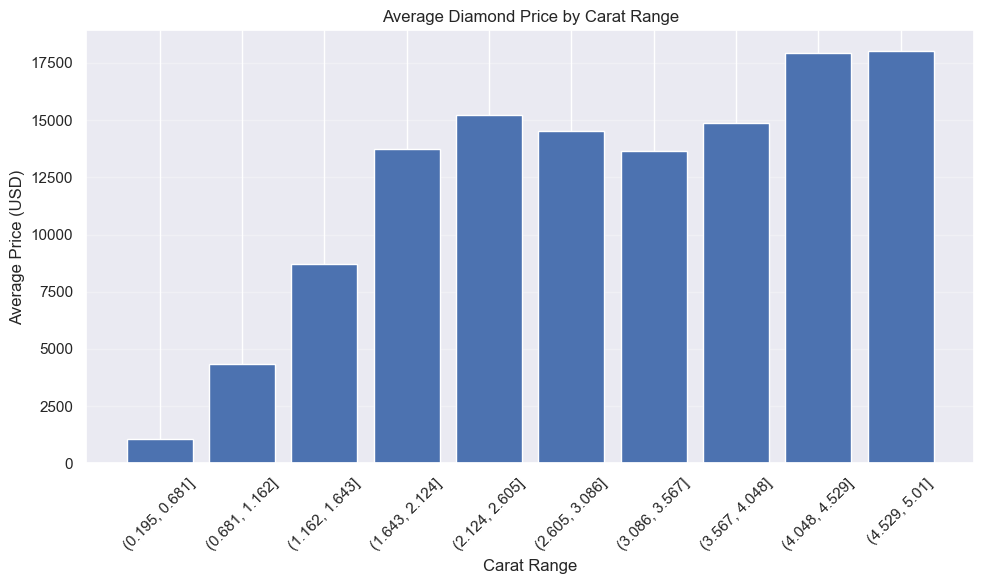

In [21]:
# Create bins for carat values
diamonds['carat_bins'] = pd.cut(diamonds['carat'], bins=10)

# Calculate mean price for each carat bin
price_by_carat = diamonds.groupby('carat_bins')['price'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(price_by_carat)), price_by_carat, width=0.8)
plt.title('Average Diamond Price by Carat Range')
plt.xlabel('Carat Range')
plt.ylabel('Average Price (USD)')

# Rotate and format x-axis labels for better readability
plt.xticks(range(len(price_by_carat)), [str(interval) for interval in price_by_carat.index], rotation=45)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



# From this bar graph showing average diamond price by carat range, we can observe:
# 1. There is a strong positive correlation between carat size and price
# 2. The relationship appears to be non-linear - price increases more steeply as carat size increases
# 3. Most diamonds in the dataset fall in the lower carat ranges (evident from previous descriptive statistics)
# 4. The highest average prices are seen in the largest carat ranges, though these likely represent a smaller number of diamonds


### 2.2 For categorical variables: frequency table, count plot

Frequency table of Cut vs Clarity:

clarity      IF  VVS1  VVS2   VS1   VS2   SI1   SI2   I1
cut                                                     
Ideal      1212  2047  2606  3589  5071  4282  2598  146
Premium     230   616   870  1989  3357  3575  2949  205
Very Good   268   789  1235  1775  2591  3240  2100   84
Good         71   186   286   648   978  1560  1081   96
Fair          9    17    69   170   261   408   466  210




<Figure size 1200x600 with 0 Axes>

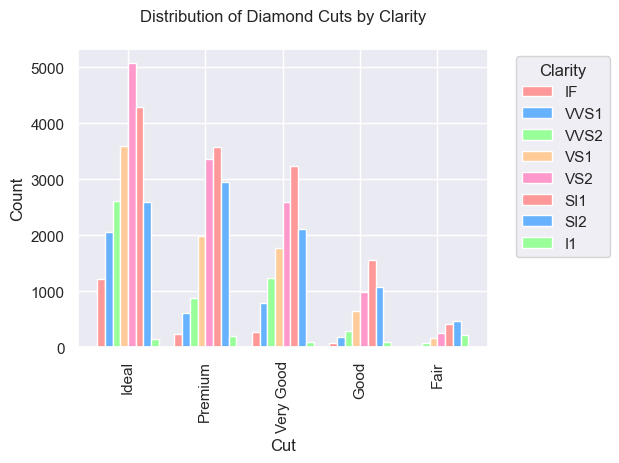

In [19]:
# Create a cross-tabulation frequency table between cut and clarity
ct = pd.crosstab(diamonds['cut'], diamonds['clarity'])
print("Frequency table of Cut vs Clarity:\n")
print(ct)
print("\n")

# Create a bar plot with wider bars
plt.figure(figsize=(12, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
ct.plot(kind='bar', stacked=False, color=colors, width=0.8)  # Increased width parameter
plt.title('Distribution of Diamond Cuts by Clarity', pad=20)
plt.xlabel('Cut')
plt.ylabel('Count')
plt.legend(title='Clarity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()






## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

### 3.2 Categorical & Categorical: stacked column chart

### 3.3 Categorical & Continuous: boxplots

### 3.4 Correlation Analysis: correlation matrix

## 4.0 Missing Value Analysis

In [14]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5.0 Outlier Analysis

## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [15]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64